In [1]:
# Abigail Glover
# ast4762
# Final Project

In [2]:
# Import libraries
import numpy as np
import astropy.io as fits
import os
import finalproject_abigailglover_support_functions as SF
import matplotlib.pyplot as plt
from astropy.stats import sigma_clip

In [3]:
# Problem 3 - Define variables

# Data information
current_folder = os.getcwd()
data_path = os.path.join(current_folder, "data")
data_dir = "data/"

# Indexing array variables
# Add one from starting array
sub_arr1 = 187
sub_arr2 = 197

frame_interval = 64
sigma_threshold = 5

# Print problem statement
print('\nProblem 3')

# Print directory name where data is saved
print("The folder 'data' can be found at the following path:", data_path)


Problem 3
The folder 'data' can be found at the following path: C:\Users\Abigail Glover\Desktop\ast4762\Homework\finalproject_abigailglover\data


In [4]:
# Problem 4 part ciii and problem 5
# Function for sorting files

# Define the function
def extract_files_in_range(file_list, sub_arr1, sub_arr2):
    filtered_files = []

    # Loop through file names and organize based on number
    for file_name in file_list:
        if file_name.endswith('.fits'):

            # Use '_' as a separator
            file_number = int(file_name.split('_')[3][1:]) 
            if sub_arr1 <= file_number <= sub_arr2:
                filtered_files.append(file_name)

    return filtered_files

In [5]:
# Import libraries
import os
from astropy.io import fits
import numpy as np

def read_fits_files(folder_path, sub_arr1, sub_arr2):
    fits_data = None  # Initialize the 3D data cube
    frame_parameters = []  # Initialize the list for frame parameters

    # Check if the specified folder exists
    if not os.path.exists(folder_path):
        print(f"The folder {folder_path} does not exist.")
        return fits_data, frame_parameters

    # Get a list of files in the folder
    files = os.listdir(folder_path)

    # Filter files based on the subarray set range
    files_in_directory = os.listdir(folder_path)
    filtered_files = extract_files_in_range(files_in_directory, sub_arr1, sub_arr2)

    # Counter to keep track of file index
    file_counter = 0

    # Iterate through each file in the filtered list
    for file_name in filtered_files:
        file_path = os.path.join(folder_path, file_name)

        try:
            # Read the FITS file
            with fits.open(file_path) as hdul:
                
                # Extract data and header from the FITS file
                file_data = hdul[0].data.copy()
                fits_header = hdul[0].header

                # Find the observation time, exposure time, and frame time in the FITS header
                observation_time = fits_header.get('UTCS_OBS', '')
                frame_time = fits_header.get('FRAMTIME', None)
                exposure_duration = fits_header.get('EXPTIME', None)                
                
                # Problem 4 c iii
                # Take half of the exposure time and add it to a time keyword
                exposure_duration_copy = exposure_duration
                mid_time = exposure_duration_copy / 2

                # Determine the number of frames to insert
                num_frames = file_data.shape[0]

                # Get the mid-time of the first frame
                mid_time_first_frame = observation_time + float(mid_time)
                
                # Initialize fits_data if it is None
                if fits_data is None:
                    fits_data = np.empty((0,) + file_data.shape[1:], dtype=file_data.dtype)

                # Iterate through each frame in the current file
                for i in range(num_frames):
                    # Increment the frame index
                    frame_index = (file_counter * 64) + i + 1

                    # Calculate the frame timing
                    frame_timing = observation_time if i == 0 else fits_header['UTCS_OBS'] + float(i * frame_time)

                    # Append frame parameters to the list
                    frame_parameters.append({
                        'file_name': file_name,
                        'frame_index': frame_index,
                        'num_frames': num_frames,
                        'observation_time': observation_time,
                        'frame_timing': frame_timing,
                        'median_background': None,  # Placeholder for median background
                    })

                    # Append data into the 3D data cube
                    fits_data = np.concatenate([fits_data, file_data[i:i+1]])

        except Exception as e:
            print(f"Error reading {file_name}: {str(e)}")
        
        # Increment the file counter
        file_counter += 1
        
        # Print filename and UTCS OBS for every 10th file
        if (file_counter - 1) % 10 == 0:
            print(f"File {file_counter}: {file_name}, UTCS OBS: {observation_time}")

    # Convert the list to an array for frame parameters
    frame_parameters_array = np.array([
        (item['file_name'], item['frame_index'], item['num_frames'],
         item['observation_time'], item['frame_timing'], item['median_background'],
         item.get('other_parameters', ''))
        for item in frame_parameters
    ], dtype=[('file_name', 'U50'), ('frame_index', int), ('num_frames', int),
              ('observation_time', 'U50'), ('frame_timing', 'U50'),
              ('median_background', float), ('other_parameters', 'U50')])

    return fits_data, frame_parameters_array


In [6]:
# Problem 4 Part c
sub_arr_start = sub_arr1
tot_sub_arrs = (sub_arr2 - sub_arr1) + 1

# Print statements
print(f"\nStarting subarray set:", sub_arr_start)
print(f"\nTotal number of subarray sets:", tot_sub_arrs)
print("\n\n")

# Print Problem Statement
print('Problem 5')

# Set this variable to True to run the routine
run_routine = True

# Run the function
if run_routine:
    
    # Run the routine and capture the return values
    data_cube, frame_params_array = read_fits_files(data_path, sub_arr1, sub_arr2)

else:
    print("Routine not executed. Set run_routine to True to run the routine.")


Starting subarray set: 187

Total number of subarray sets: 11



Problem 5
File 1: SPITZER_I4_20674048_0187_0000_2_bcd.fits, UTCS OBS: 215354061.366
File 11: SPITZER_I4_20674048_0197_0000_2_bcd.fits, UTCS OBS: 215354335.502


In [7]:
    # Problem 4 part a
    # Print the number of frames in the subarray
    if frame_params_array is not None:
        frames_in_subarray = frame_params_array[frame_params_array['frame_index'] <= tot_sub_arrs]['num_frames']
        total_frames = np.sum(frames_in_subarray)
        print(f"\nTotal number of frames in the subarray: {total_frames}")

    # Print the dimensions of the image cube
    if data_cube is not None:
        cube_size = data_cube.shape
        print(f"\nImage cube size: {cube_size}")



Total number of frames in the subarray: 704

Image cube size: (704, 32, 32)


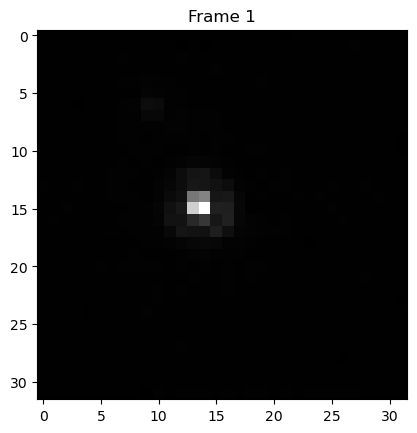

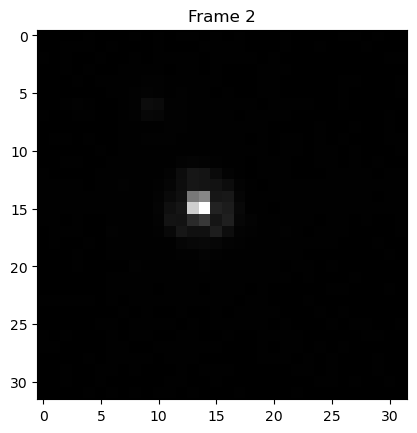

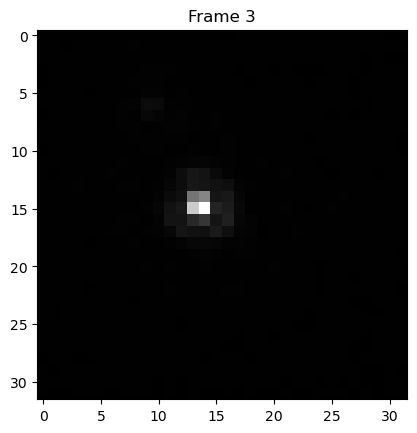

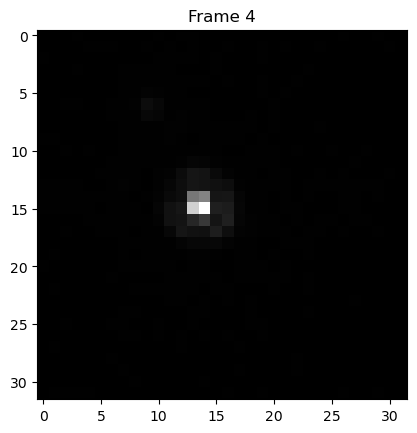

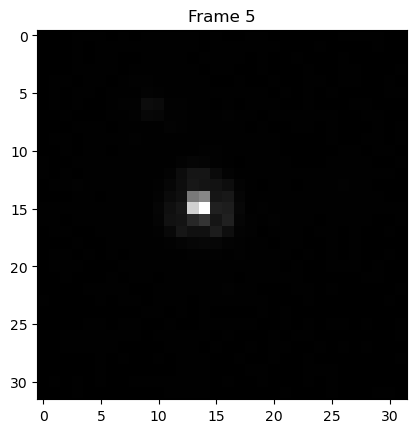

In [8]:
    # Get the first 5 frames
    first_five_frames = data_cube[:5]

    # Display the first 5 frames using imshow
    for i in range(len(first_five_frames)):
        plt.imshow(first_five_frames[i, :, :], cmap='gray')
        plt.title(f"Frame {i + 1}")
        plt.show()

In [10]:
# Print Problem Statement
print("\nProblem 6")

# Get the shape of the data array
frame_params_shape = frame_params_array.shape

# Initialize boolean mask array to True
mask_array = np.full(frame_params_shape, True, dtype=bool)



Problem 6


In [11]:
def update_arrays(data_array, mask_array, flagged_pixels):

    # Update mask_array
    mask_array[flagged_pixels] = False

    # Update data_array, setting flagged pixels to 0
    data_array[flagged_pixels] = 0

    return data_array, mask_array


Problem 7
Frame 1 - Median Background: 3.269939661026001


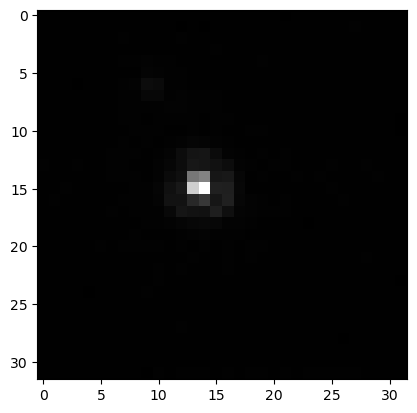

Frame 2 - Median Background: 4.450080871582031


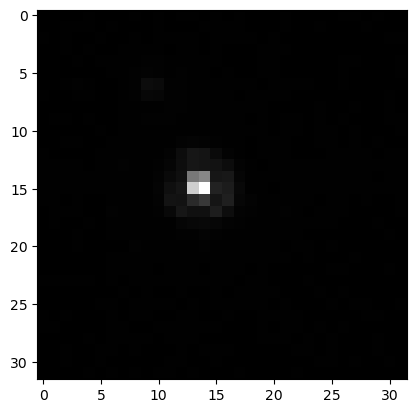

Frame 3 - Median Background: 4.257164001464844


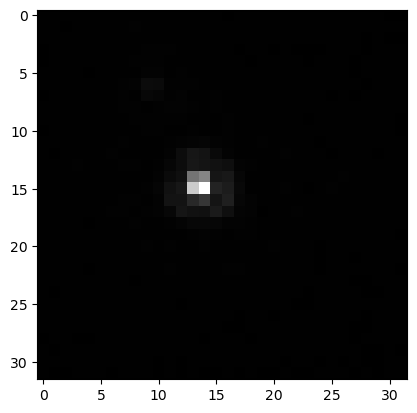

Frame 4 - Median Background: 4.457277774810791


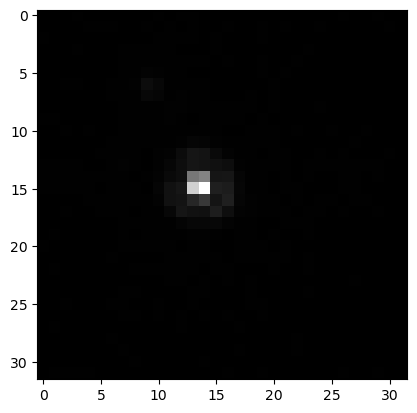

Frame 5 - Median Background: 4.571830749511719


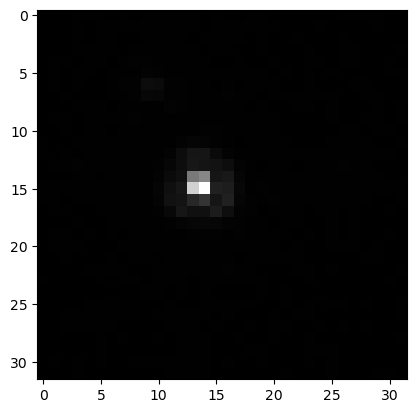

In [12]:
# Print Problem Statement
print("\nProblem 7")

# Find the median value in each frame for the whole set
median_backgrounds = np.median(data_cube, axis=(1, 2))

# Record median background in the frame parameters array
frame_params_array['median_background'] = median_backgrounds

# Subtract the median background from each frame
data_cube -= median_backgrounds[:, np.newaxis, np.newaxis]

# Print the first five updated frames
for i in range(5):
    print(f"Frame {i + 1} - Median Background: {frame_params_array['median_background'][i]}")
    plt.imshow(data_cube[i, :, :], cmap='gray')
    plt.show()

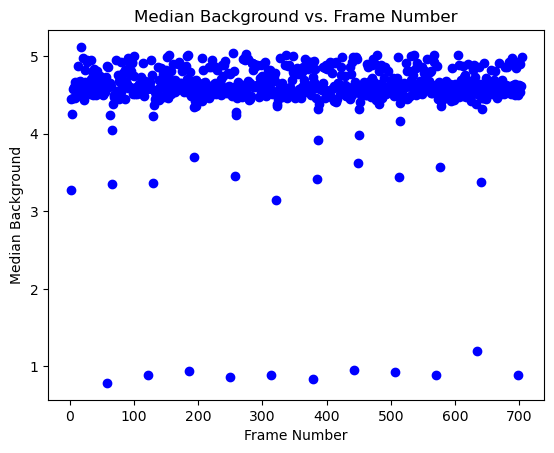

In [20]:
# Scatter plot of the median background vs. frame number
plt.scatter(range(1, len(median_backgrounds) + 1), median_backgrounds, marker='o', c='blue')
plt.xlabel('Frame Number')
plt.ylabel('Median Background')
plt.title('Median Background vs. Frame Number')
plt.show()


Problem 8
Frame 1 - Median Background: nan


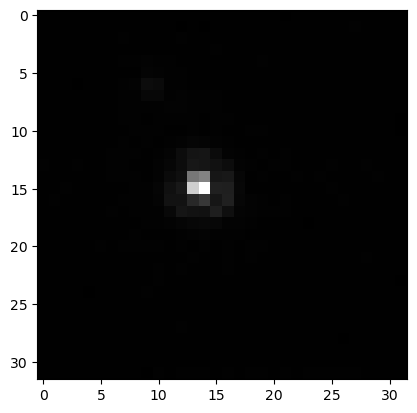

Frame 2 - Median Background: 4.450080871582031


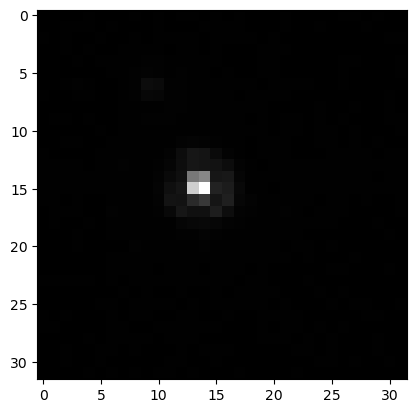

Frame 3 - Median Background: 4.257164001464844


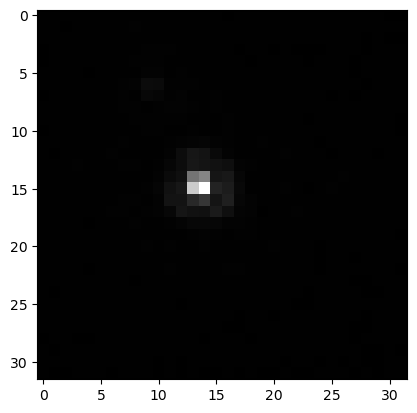

Frame 4 - Median Background: 4.457277774810791


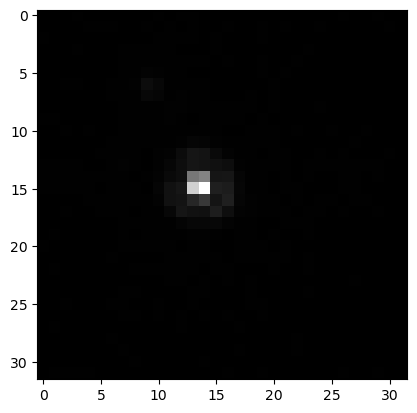

Frame 5 - Median Background: 4.571830749511719


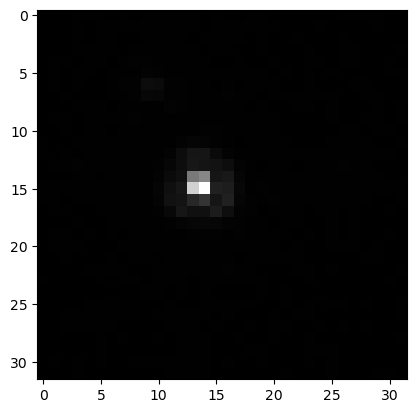

In [13]:
# Print Problem Statement
print('\nProblem 8')

# Apply sigma clipping to the median backgrounds
good_median_mask = ~sigma_clip(median_backgrounds, sigma=5, maxiters=None).mask

# Record median background in the frame parameters array for only the good median backgrounds
frame_params_array['median_background'] = np.where(good_median_mask, median_backgrounds, np.nan)

# Subtract the median background from each frame only for the good median backgrounds
data_cube -= np.where(good_median_mask[:, np.newaxis, np.newaxis], median_backgrounds[:, np.newaxis, np.newaxis], 0)

# Print the first five updated frames
for i in range(5):
    print(f"Frame {i + 1} - Median Background: {frame_params_array['median_background'][i]}")
    plt.imshow(data_cube[i, :, :], cmap='gray')
    plt.show()

# Return a Boolean array indicating good (True) and bad (False) pixels based on sigma clipping
good_pixels_mask = np.where(good_median_mask[:, np.newaxis, np.newaxis], True, False)


In [14]:
# Print Problem statement
print("\n\nProblem 9")

# Find bad pixels using the inverse of the good pixels mask
bad_pixels_mask = ~good_pixels_mask

# Print results
print(f"Number of bad pixels: {np.sum(bad_pixels_mask)}")



Problem 9
Number of bad pixels: 22


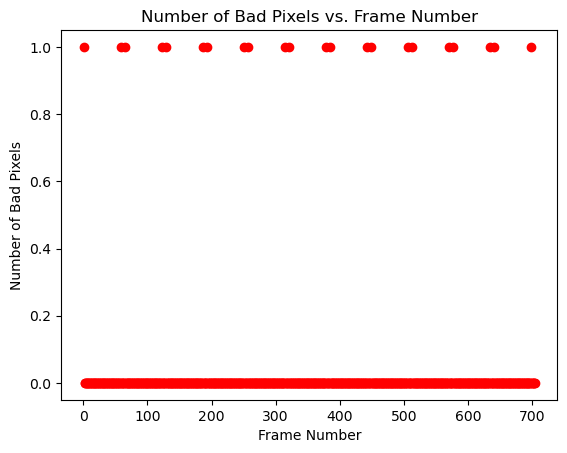

In [19]:
# Count the number of bad pixels for each frame
bad_pixels_count_per_frame = np.sum(bad_pixels_mask, axis=(1, 2))

# Scatter plot of the number of bad pixels vs. frame number
plt.scatter(range(1, len(bad_pixels_count_per_frame) + 1), bad_pixels_count_per_frame, marker='o', c='red')
plt.xlabel('Frame Number')
plt.ylabel('Number of Bad Pixels')
plt.title('Number of Bad Pixels vs. Frame Number')

plt.show()
